In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
import warnings
from typing import Dict, List, Tuple, Optional, Union
import os

warnings.filterwarnings('ignore')

# Handle scipy version compatibility
try:
    from scipy.stats import binomtest
    def binom_test(x, n, p=0.5):
        return binomtest(x, n, p, alternative='two-sided').pvalue
except ImportError:
    from scipy.stats import binom
    def binom_test(x, n, p=0.5):
        prob = min(binom.cdf(x, n, p), 1 - binom.cdf(x-1, n, p))
        return 2 * prob

Example 1: Bitcoin Analysis

🚀 COMPREHENSIVE ANALYSIS: BTC

📊 Analyzing BTC - 1D Timeframe
✓ Loaded btc_results_1d_3class.csv: 80 rows
✓ Loaded btc_results_1d_4class.csv: 80 rows
📈 Using 80 paired samples for analysis
  loss_count   | Winner: 3-Class | Win Rate:  10.0% | P-value:  0.000 | Cohen's d: -0.903
  loss_mean    | Winner: 3-Class | Win Rate:  42.5% | P-value:  0.140 | Cohen's d: -0.167
  transaction  | Winner: 4-Class | Win Rate:  91.2% | P-value:  0.000 | Cohen's d: -0.914
  ratio        | Winner: 3-Class | Win Rate:  31.2% | P-value:  0.000 | Cohen's d: -0.431

📋 Summary:
  Statistically significant (FDR-corrected): 3/4
  Practically significant: 1/4
  4-Class wins: 1/4

📊 Analyzing BTC - 4H Timeframe
✓ Loaded btc_results_4h_3class.csv: 80 rows
✓ Loaded btc_results_4h_4class.csv: 80 rows
📈 Using 80 paired samples for analysis
  loss_count   | Winner: 3-Class | Win Rate:  10.0% | P-value:  0.000 | Cohen's d: -0.711
  loss_mean    | Winner: 4-Class | Win Rate:  56.2% | P-value

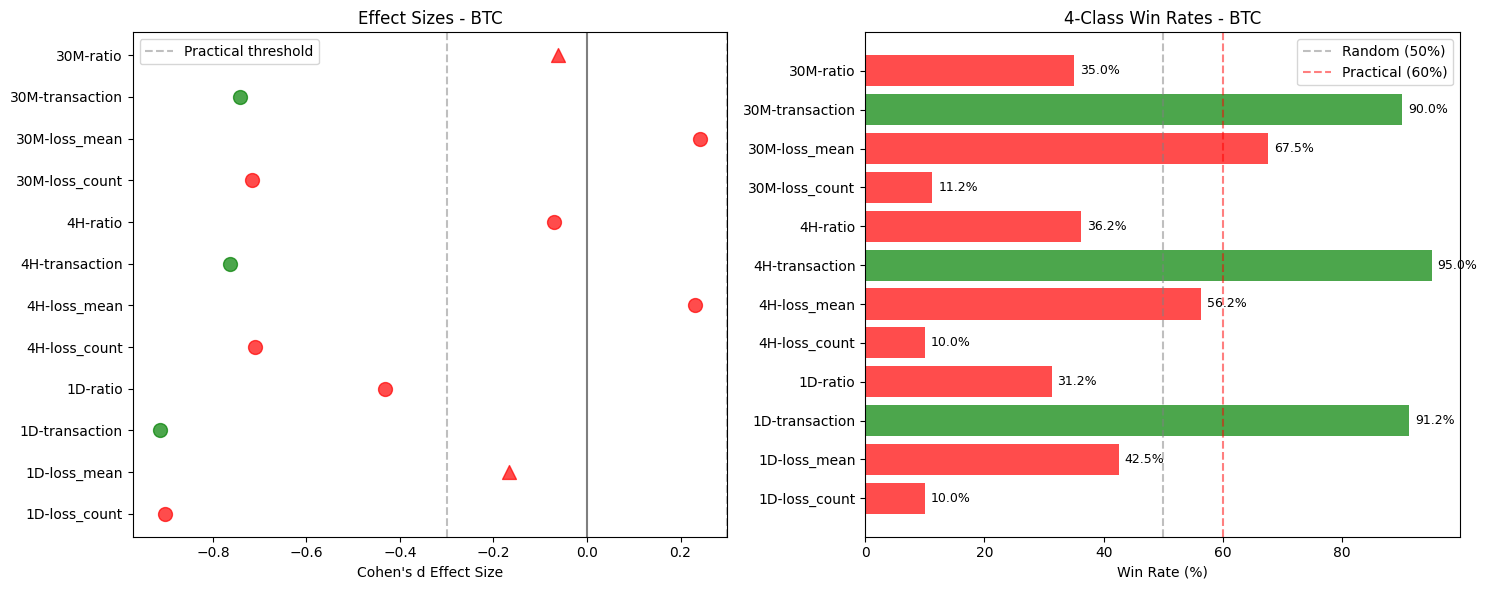


🎯 FINAL RECOMMENDATION
Total comparisons: 12
Statistically significant: 10/12 (83.3%)
Practically significant: 3/12 (25.0%)
4-Class wins: 6/12 (50.0%)

⚪ NO CLEAR RECOMMENDATION: Results are mixed
Confidence level: Low

💾 Results saved to: btc_trading_analysis.csv
Example 1: BNB Analysis

🚀 COMPREHENSIVE ANALYSIS: BNB

📊 Analyzing BNB - 1D Timeframe
✓ Loaded bnb_results_1d_3class.csv: 80 rows
✓ Loaded bnb_results_1d_4class.csv: 80 rows
📈 Using 80 paired samples for analysis
  loss_count   | Winner: 3-Class | Win Rate:  16.2% | P-value:  0.000 | Cohen's d: -0.893
  loss_mean    | Winner: 4-Class | Win Rate:  46.2% | P-value:  0.469 | Cohen's d:  0.031
  transaction  | Winner: 4-Class | Win Rate:  95.0% | P-value:  0.000 | Cohen's d: -1.082
  ratio        | Winner: 4-Class | Win Rate:  47.5% | P-value:  0.558 | Cohen's d: -0.072

📋 Summary:
  Statistically significant (FDR-corrected): 2/4
  Practically significant: 1/4
  4-Class wins: 3/4

📊 Analyzing BNB - 4H Timeframe
✓ Loaded bnb_res

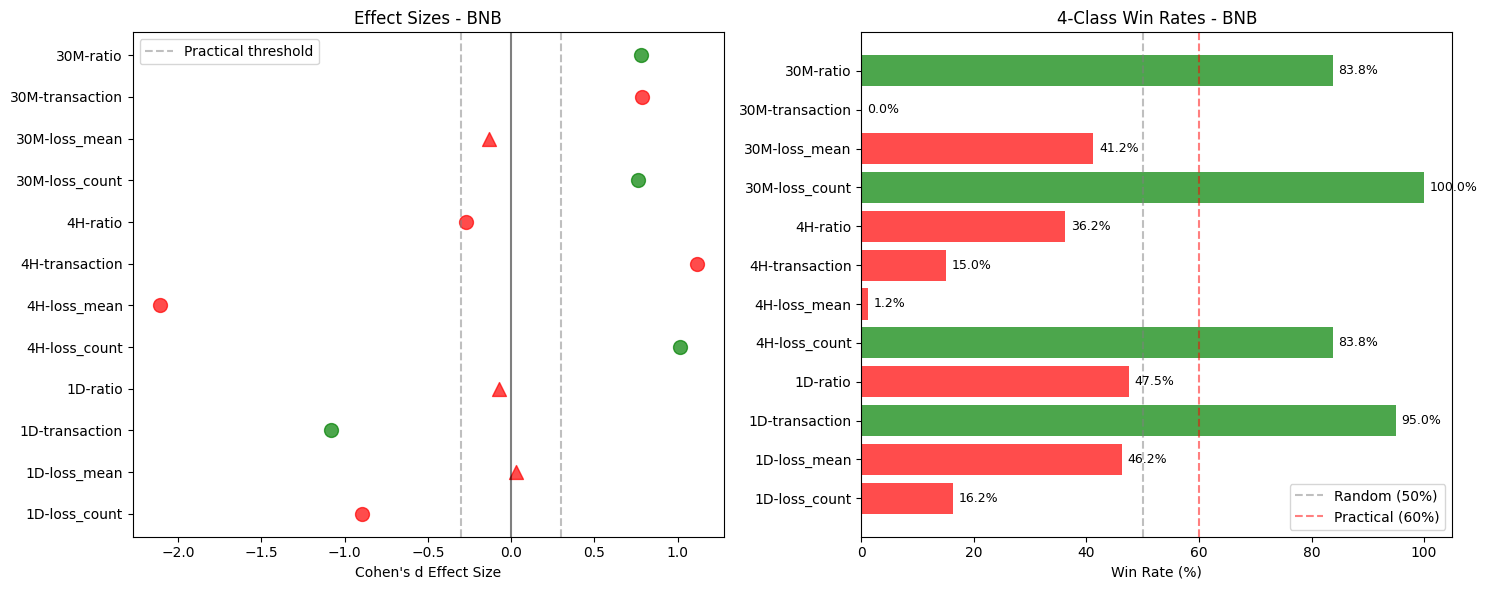


🎯 FINAL RECOMMENDATION
Total comparisons: 12
Statistically significant: 9/12 (75.0%)
Practically significant: 4/12 (33.3%)
4-Class wins: 6/12 (50.0%)

⚪ NO CLEAR RECOMMENDATION: Results are mixed
Confidence level: Low

💾 Results saved to: bnb_trading_analysis.csv
Example 1: ETH Analysis

🚀 COMPREHENSIVE ANALYSIS: ETH

📊 Analyzing ETH - 1D Timeframe
✓ Loaded eth_results_1d_3class.csv: 80 rows
✓ Loaded eth_results_1d_4class.csv: 80 rows
📈 Using 80 paired samples for analysis
  loss_count   | Winner: 3-Class | Win Rate:  15.0% | P-value:  0.000 | Cohen's d: -0.679
  loss_mean    | Winner: 4-Class | Win Rate:  53.8% | P-value:  0.157 | Cohen's d:  0.225
  transaction  | Winner: 4-Class | Win Rate:  95.0% | P-value:  0.000 | Cohen's d: -0.805
  ratio        | Winner: 3-Class | Win Rate:  42.5% | P-value:  0.517 | Cohen's d: -0.011

📋 Summary:
  Statistically significant (FDR-corrected): 2/4
  Practically significant: 1/4
  4-Class wins: 2/4

📊 Analyzing ETH - 4H Timeframe
✓ Loaded eth_resu

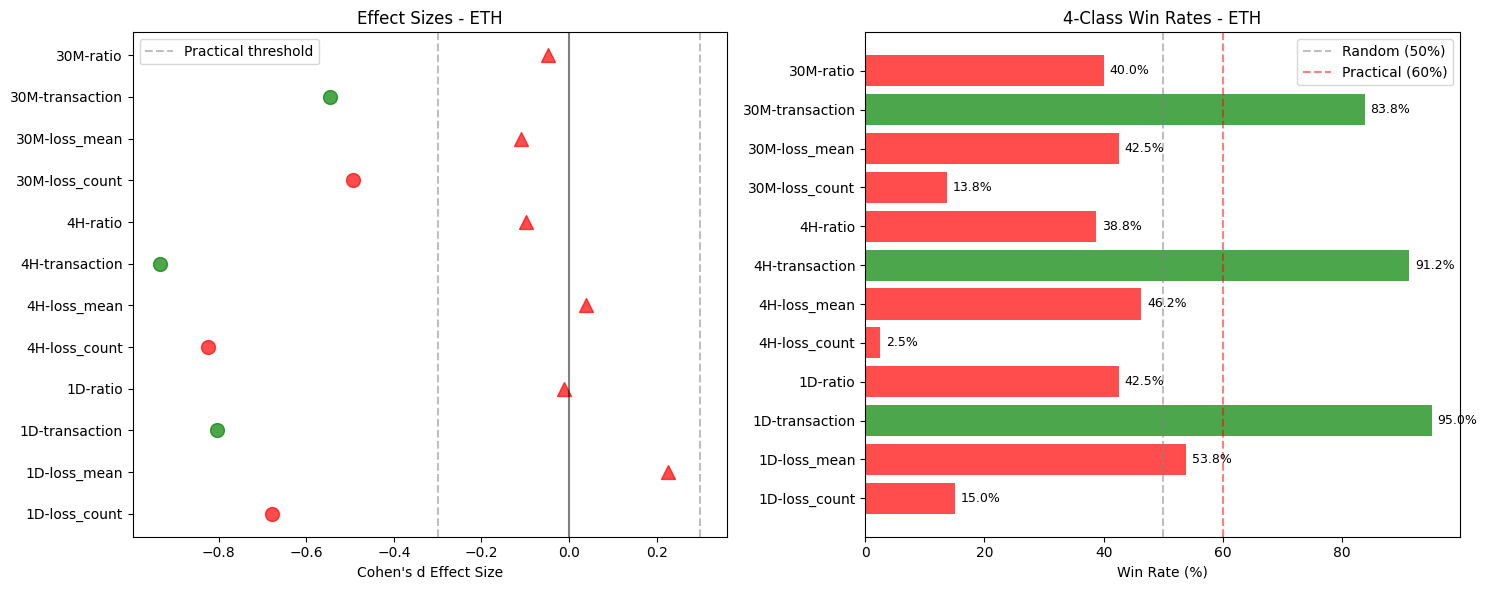


🎯 FINAL RECOMMENDATION
Total comparisons: 12
Statistically significant: 6/12 (50.0%)
Practically significant: 3/12 (25.0%)
4-Class wins: 4/12 (33.3%)

🟡 MODERATE RECOMMENDATION: Consider 3-Class approach
Confidence level: Medium

💾 Results saved to: eth_trading_analysis.csv


In [2]:
#!/usr/bin/env python3
"""
Crypto Trading Strategy Analyzer
Simple and reusable functions for comparing 3-class vs 4-class trading strategies
Works with BTC, ETH, BNB, and any other crypto datasets
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
import warnings
from typing import Dict, List, Tuple, Optional, Union
import os

warnings.filterwarnings('ignore')

# Handle scipy version compatibility
try:
    from scipy.stats import binomtest
    def binom_test(x, n, p=0.5):
        return binomtest(x, n, p, alternative='two-sided').pvalue
except ImportError:
    from scipy.stats import binom
    def binom_test(x, n, p=0.5):
        prob = min(binom.cdf(x, n, p), 1 - binom.cdf(x-1, n, p))
        return 2 * prob

# ================== CORE ANALYSIS FUNCTIONS ==================

def load_and_preprocess(file_path: str) -> pd.DataFrame:
    """
    Load and preprocess trading data
    
    Args:
        file_path: Path to CSV file
    
    Returns:
        Preprocessed DataFrame
    """
    try:
        df = pd.read_csv(file_path)
        print(f"✓ Loaded {os.path.basename(file_path)}: {len(df)} rows")
    except FileNotFoundError:
        print(f"✗ File not found: {file_path}")
        # Create dummy data for testing
        np.random.seed(42)
        df = pd.DataFrame({
            'loss_count': np.random.poisson(5, 100),
            'loss_mean': np.random.normal(0.02, 0.01, 100),
            'transaction': np.random.poisson(20, 100) + 1,
            'ratio': np.random.beta(2, 8, 100)
        })
        print(f"✓ Created dummy data: {len(df)} rows")
    
    # Preprocess data
    df['transaction'] = df['transaction'].replace(0, 0.01)  # Avoid division by zero
    if 'ratio' not in df.columns:
        df['ratio'] = df['loss_count'] / df['transaction']
    
    return df


def calculate_statistics(data_3class: np.ndarray, data_4class: np.ndarray, 
                        metric_name: str) -> Dict:
    """
    Calculate comprehensive statistics for comparing two datasets
    
    Args:
        data_3class: 3-class strategy results
        data_4class: 4-class strategy results
        metric_name: Name of the metric being compared
    
    Returns:
        Dictionary with all statistics
    """
    # Remove NaN values
    valid_mask = ~(np.isnan(data_3class) | np.isnan(data_4class))
    data_3 = data_3class[valid_mask]
    data_4 = data_4class[valid_mask]
    
    if len(data_3) == 0:
        return {'error': 'No valid data after removing NaN values'}
    
    # Basic descriptive statistics
    stats_dict = {
        'metric': metric_name,
        'sample_size': len(data_3),
        'median_3class': np.median(data_3),
        'median_4class': np.median(data_4),
        'mean_3class': np.mean(data_3),
        'mean_4class': np.mean(data_4),
        'std_3class': np.std(data_3, ddof=1),
        'std_4class': np.std(data_4, ddof=1)
    }
    
    # Differences
    stats_dict['median_diff'] = stats_dict['median_3class'] - stats_dict['median_4class']
    stats_dict['mean_diff'] = stats_dict['mean_3class'] - stats_dict['mean_4class']
    
    # Relative differences (percentage)
    if stats_dict['median_3class'] != 0:
        stats_dict['median_diff_pct'] = (stats_dict['median_diff'] / stats_dict['median_3class']) * 100
    else:
        stats_dict['median_diff_pct'] = 0
    
    # Statistical tests
    try:
        _, stats_dict['wilcoxon_p'] = wilcoxon(data_3, data_4, alternative='two-sided')
    except:
        stats_dict['wilcoxon_p'] = 1.0
    
    # Sign test (binomial test)
    differences = data_3 - data_4
    if metric_name.lower() in ['loss_count', 'loss_mean', 'ratio']:
        # For these metrics, negative differences mean 4-class is better
        positive_diffs = np.sum(differences < 0)
    else:
        # For transaction count, positive differences might be better
        positive_diffs = np.sum(differences > 0)
    
    try:
        stats_dict['sign_test_p'] = binom_test(positive_diffs, len(differences))
    except:
        stats_dict['sign_test_p'] = 1.0
    
    # Effect size (Cohen's d for paired data)
    diff = data_3 - data_4
    if np.std(diff, ddof=1) != 0:
        stats_dict['cohen_d'] = np.mean(diff) / np.std(diff, ddof=1)
    else:
        stats_dict['cohen_d'] = 0
    
    # Win rate calculation
    if metric_name.lower() in ['loss_count', 'loss_mean', 'ratio']:
        wins_4class = np.sum(data_4 < data_3)
        stats_dict['better_direction'] = 'lower'
    else:
        wins_4class = np.sum(data_4 > data_3)
        stats_dict['better_direction'] = 'higher'
    
    stats_dict['wins_4class'] = wins_4class
    stats_dict['win_rate_4class'] = (wins_4class / len(data_3)) * 100
    
    # Practical significance thresholds
    PRACTICAL_WIN_RATE = 60
    PRACTICAL_EFFECT_SIZE = 0.3
    PRACTICAL_MEDIAN_DIFF = 5
    
    stats_dict['practical_win_rate'] = stats_dict['win_rate_4class'] > PRACTICAL_WIN_RATE
    stats_dict['practical_effect_size'] = abs(stats_dict['cohen_d']) > PRACTICAL_EFFECT_SIZE
    stats_dict['practical_median_diff'] = abs(stats_dict['median_diff_pct']) > PRACTICAL_MEDIAN_DIFF
    
    # Overall practical significance
    stats_dict['practical_significant'] = (stats_dict['practical_win_rate'] and 
                                         stats_dict['practical_effect_size'] and 
                                         stats_dict['practical_median_diff'])
    
    # Statistical significance
    stats_dict['statistically_significant'] = stats_dict['wilcoxon_p'] < 0.05
    
    # Determine winner
    if metric_name.lower() in ['loss_count', 'loss_mean', 'ratio']:
        stats_dict['winner'] = '4-Class' if stats_dict['median_4class'] < stats_dict['median_3class'] else '3-Class'
    else:
        stats_dict['winner'] = '4-Class' if stats_dict['median_4class'] > stats_dict['median_3class'] else '3-Class'
    
    # Effect size interpretation
    effect_magnitude = abs(stats_dict['cohen_d'])
    if effect_magnitude < 0.2:
        stats_dict['effect_size_magnitude'] = 'Negligible'
    elif effect_magnitude < 0.5:
        stats_dict['effect_size_magnitude'] = 'Small'
    elif effect_magnitude < 0.8:
        stats_dict['effect_size_magnitude'] = 'Medium'
    else:
        stats_dict['effect_size_magnitude'] = 'Large'
    
    return stats_dict


def fdr_correction(p_values: List[float]) -> List[float]:
    """Apply False Discovery Rate (FDR) correction using Benjamini-Hochberg method"""
    p_values = np.array(p_values)
    sorted_indices = np.argsort(p_values)
    sorted_p = p_values[sorted_indices]
    n = len(p_values)
    
    adjusted_p = np.zeros_like(sorted_p)
    for i in range(n-1, -1, -1):
        if i == n-1:
            adjusted_p[i] = sorted_p[i]
        else:
            adjusted_p[i] = min(adjusted_p[i+1], sorted_p[i] * n / (i+1))
    
    # Restore original order
    result = np.zeros_like(p_values)
    result[sorted_indices] = adjusted_p
    return result.tolist()


# ================== MAIN ANALYSIS FUNCTIONS ==================

def compare_strategies(file_3class: str, file_4class: str, 
                      crypto_name: str = "CRYPTO", timeframe: str = "1D") -> Dict:
    """
    Compare 3-class vs 4-class strategies for a single timeframe
    
    Args:
        file_3class: Path to 3-class results CSV
        file_4class: Path to 4-class results CSV
        crypto_name: Name of cryptocurrency (BTC, ETH, BNB, etc.)
        timeframe: Trading timeframe (1D, 4H, 30M, etc.)
    
    Returns:
        Dictionary with comparison results
    """
    print(f"\n📊 Analyzing {crypto_name} - {timeframe} Timeframe")
    print("=" * 50)
    
    # Load data
    df_3 = load_and_preprocess(file_3class)
    df_4 = load_and_preprocess(file_4class)
    
    # Ensure same sample size (paired data)
    min_rows = min(len(df_3), len(df_4))
    df_3 = df_3.iloc[:min_rows]
    df_4 = df_4.iloc[:min_rows]
    
    print(f"📈 Using {min_rows} paired samples for analysis")
    
    # Analyze each metric
    metrics = ['loss_count', 'loss_mean', 'transaction', 'ratio']
    results = {}
    
    for metric in metrics:
        data_3 = df_3[metric].values
        data_4 = df_4[metric].values
        
        stats = calculate_statistics(data_3, data_4, metric)
        if 'error' not in stats:
            results[metric] = stats
            
            # Print quick summary
            print(f"  {metric:12} | Winner: {stats['winner']:7} | "
                  f"Win Rate: {stats['win_rate_4class']:5.1f}% | "
                  f"P-value: {stats['wilcoxon_p']:6.3f} | "
                  f"Cohen's d: {stats['cohen_d']:6.3f}")
    
    # Apply multiple testing correction
    p_values = [results[metric]['wilcoxon_p'] for metric in results.keys()]
    adjusted_p = fdr_correction(p_values)
    
    for i, metric in enumerate(results.keys()):
        results[metric]['wilcoxon_p_adjusted'] = adjusted_p[i]
        results[metric]['stat_sig_adjusted'] = adjusted_p[i] < 0.05
    
    # Summary statistics
    total_metrics = len(results)
    stat_sig_count = sum(1 for r in results.values() if r['stat_sig_adjusted'])
    practical_sig_count = sum(1 for r in results.values() if r['practical_significant'])
    four_class_wins = sum(1 for r in results.values() if r['winner'] == '4-Class')
    
    summary = {
        'crypto': crypto_name,
        'timeframe': timeframe,
        'total_metrics': total_metrics,
        'statistically_significant': stat_sig_count,
        'practically_significant': practical_sig_count,
        'four_class_wins': four_class_wins,
        'results': results
    }
    
    # Print summary
    print(f"\n📋 Summary:")
    print(f"  Statistically significant (FDR-corrected): {stat_sig_count}/{total_metrics}")
    print(f"  Practically significant: {practical_sig_count}/{total_metrics}")
    print(f"  4-Class wins: {four_class_wins}/{total_metrics}")
    
    return summary


def analyze_multiple_timeframes(crypto_name: str, base_path: str = "", 
                               timeframes: List[str] = ['1d', '4h', '30m']) -> Dict:
    """
    Analyze multiple timeframes for a single cryptocurrency
    
    Args:
        crypto_name: Name of crypto (btc, eth, bnb, etc.)
        base_path: Base directory path for files
        timeframes: List of timeframes to analyze
    
    Returns:
        Dictionary with results for all timeframes
    """
    print(f"\n🚀 COMPREHENSIVE ANALYSIS: {crypto_name.upper()}")
    print("=" * 60)
    
    all_results = {}
    
    for tf in timeframes:
        # Construct file paths
        file_3class = os.path.join(base_path, f"{crypto_name}_results_{tf}_3class.csv")
        file_4class = os.path.join(base_path, f"{crypto_name}_results_{tf}_4class.csv")
        
        try:
            result = compare_strategies(file_3class, file_4class, crypto_name.upper(), tf.upper())
            all_results[tf] = result
        except Exception as e:
            print(f"❌ Error analyzing {tf}: {e}")
    
    return all_results


def create_summary_table(results: Dict) -> pd.DataFrame:
    """Create a comprehensive summary table from analysis results"""
    rows = []
    
    for timeframe, tf_result in results.items():
        for metric, stats in tf_result['results'].items():
            row = {
                'Crypto': tf_result['crypto'],
                'Timeframe': tf_result['timeframe'],
                'Metric': metric,
                'Sample_Size': stats['sample_size'],
                'Median_3Class': round(stats['median_3class'], 4),
                'Median_4Class': round(stats['median_4class'], 4),
                'Median_Diff': round(stats['median_diff'], 4),
                'Median_Diff_%': round(stats['median_diff_pct'], 2),
                'Win_Rate_4Class_%': round(stats['win_rate_4class'], 1),
                'Cohen_D': round(stats['cohen_d'], 3),
                'Effect_Size': stats['effect_size_magnitude'],
                'P_Value': f"{stats['wilcoxon_p']:.3e}",
                'P_Adjusted': f"{stats['wilcoxon_p_adjusted']:.3e}",
                'Stat_Sig': '✓' if stats['stat_sig_adjusted'] else '✗',
                'Practical_Sig': '✓' if stats['practical_significant'] else '✗',
                'Winner': stats['winner']
            }
            rows.append(row)
    
    return pd.DataFrame(rows)


def plot_results(results: Dict, crypto_name: str = ""):
    """Create visualizations of the analysis results"""
    
    # Prepare data for plotting
    plot_data = []
    for timeframe, tf_result in results.items():
        for metric, stats in tf_result['results'].items():
            plot_data.append({
                'timeframe': tf_result['timeframe'],
                'metric': metric,
                'cohen_d': stats['cohen_d'],
                'win_rate': stats['win_rate_4class'],
                'practical_sig': stats['practical_significant'],
                'stat_sig': stats['stat_sig_adjusted']
            })
    
    if not plot_data:
        print("No data to plot")
        return
    
    df_plot = pd.DataFrame(plot_data)
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Effect sizes
    colors = ['green' if practical else 'red' for practical in df_plot['practical_sig']]
    markers = ['o' if stat_sig else '^' for stat_sig in df_plot['stat_sig']]
    
    labels = [f"{tf}-{metric}" for tf, metric in zip(df_plot['timeframe'], df_plot['metric'])]
    
    for i, (label, cohen_d, color, marker) in enumerate(zip(labels, df_plot['cohen_d'], colors, markers)):
        ax1.scatter(cohen_d, i, c=color, marker=marker, s=100, alpha=0.7)
    
    ax1.axvline(-0.3, color='gray', linestyle='--', alpha=0.5, label='Practical threshold')
    ax1.axvline(0, color='black', linestyle='-', alpha=0.5)
    ax1.axvline(0.3, color='gray', linestyle='--', alpha=0.5)
    ax1.set_xlabel("Cohen's d Effect Size")
    ax1.set_yticks(range(len(labels)))
    ax1.set_yticklabels(labels)
    ax1.set_title(f"Effect Sizes - {crypto_name}")
    ax1.legend()
    
    # Plot 2: Win rates
    bars = ax2.barh(labels, df_plot['win_rate'], color=colors, alpha=0.7)
    ax2.axvline(50, color='gray', linestyle='--', alpha=0.5, label='Random (50%)')
    ax2.axvline(60, color='red', linestyle='--', alpha=0.5, label='Practical (60%)')
    ax2.set_xlabel("Win Rate (%)")
    ax2.set_title(f"4-Class Win Rates - {crypto_name}")
    ax2.legend()
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax2.text(width + 1, bar.get_y() + bar.get_height()/2, 
                f'{width:.1f}%', ha='left', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()


def generate_recommendation(results: Dict) -> str:
    """Generate final recommendation based on analysis results"""
    
    total_comparisons = 0
    total_stat_sig = 0
    total_practical_sig = 0
    total_4class_wins = 0
    
    for tf_result in results.values():
        total_comparisons += tf_result['total_metrics']
        total_stat_sig += tf_result['statistically_significant']
        total_practical_sig += tf_result['practically_significant']
        total_4class_wins += tf_result['four_class_wins']
    
    if total_comparisons == 0:
        return "❌ No valid comparisons found"
    
    # Calculate percentages
    stat_sig_pct = (total_stat_sig / total_comparisons) * 100
    practical_sig_pct = (total_practical_sig / total_comparisons) * 100
    four_class_win_pct = (total_4class_wins / total_comparisons) * 100
    
    print(f"\n🎯 FINAL RECOMMENDATION")
    print("=" * 40)
    print(f"Total comparisons: {total_comparisons}")
    print(f"Statistically significant: {total_stat_sig}/{total_comparisons} ({stat_sig_pct:.1f}%)")
    print(f"Practically significant: {total_practical_sig}/{total_comparisons} ({practical_sig_pct:.1f}%)")
    print(f"4-Class wins: {total_4class_wins}/{total_comparisons} ({four_class_win_pct:.1f}%)")
    
    # Generate recommendation
    if four_class_win_pct >= 75 and practical_sig_pct >= 50:
        recommendation = "🟢 STRONG RECOMMENDATION: Adopt 4-Class approach"
        confidence = "High"
    elif four_class_win_pct <= 25 and practical_sig_pct >= 50:
        recommendation = "🔴 STRONG RECOMMENDATION: Maintain 3-Class approach"
        confidence = "High"
    elif four_class_win_pct >= 60 and stat_sig_pct >= 40:
        recommendation = "🟡 MODERATE RECOMMENDATION: Consider 4-Class approach"
        confidence = "Medium"
    elif four_class_win_pct <= 40 and stat_sig_pct >= 40:
        recommendation = "🟡 MODERATE RECOMMENDATION: Consider 3-Class approach"
        confidence = "Medium"
    else:
        recommendation = "⚪ NO CLEAR RECOMMENDATION: Results are mixed"
        confidence = "Low"
    
    print(f"\n{recommendation}")
    print(f"Confidence level: {confidence}")
    
    return recommendation


# ================== CONVENIENCE FUNCTIONS ==================

def analyze_crypto(crypto_name: str, base_path: str = "", 
                   timeframes: List[str] = ['1d', '4h', '30m'],
                   save_results: bool = True) -> Dict:
    """
    Complete analysis for a single cryptocurrency across multiple timeframes
    
    Args:
        crypto_name: Name of crypto (btc, eth, bnb, etc.)
        base_path: Base directory containing CSV files
        timeframes: List of timeframes to analyze
        save_results: Whether to save results to CSV
    
    Returns:
        Complete analysis results
    """
    # Run analysis
    results = analyze_multiple_timeframes(crypto_name, base_path, timeframes)
    
    if not results:
        print(f"❌ No results found for {crypto_name}")
        return {}
    
    # Create summary table
    summary_table = create_summary_table(results)
    
    print(f"\n📋 DETAILED RESULTS TABLE:")
    print(summary_table.to_string(index=False))
    # tạm bỏ code 
    # Generate plots
    plot_results(results, crypto_name.upper())
    
    # Generate recommendation
    recommendation = generate_recommendation(results)
    
    # Save results
    if save_results:
        output_file = f"{crypto_name}_trading_analysis.csv"
        summary_table.to_csv(output_file, index=False)
        print(f"\n💾 Results saved to: {output_file}")
    
    return {
        'results': results,
        'summary_table': summary_table,
        'recommendation': recommendation
    }


def quick_compare(file_3class: str, file_4class: str, 
                 crypto_name: str = "CRYPTO", timeframe: str = "1D") -> None:
    """
    Quick comparison between two files - prints results immediately
    
    Args:
        file_3class: Path to 3-class CSV file
        file_4class: Path to 4-class CSV file
        crypto_name: Name of cryptocurrency
        timeframe: Trading timeframe
    """
    result = compare_strategies(file_3class, file_4class, crypto_name, timeframe)
    
    summary_table = create_summary_table({timeframe.lower(): result})
    print(f"\n📋 Quick Analysis Results:")
    print(summary_table.to_string(index=False))
    
    # Simple recommendation for single timeframe
    practical_count = sum(1 for r in result['results'].values() if r['practical_significant'])
    four_class_wins = sum(1 for r in result['results'].values() if r['winner'] == '4-Class')
    total = len(result['results'])
    
    if four_class_wins >= total * 0.75:
        print(f"\n🟢 For {crypto_name} {timeframe}: Consider 4-Class approach")
    elif four_class_wins <= total * 0.25:
        print(f"\n🔴 For {crypto_name} {timeframe}: Consider 3-Class approach")
    else:
        print(f"\n🟡 For {crypto_name} {timeframe}: Mixed results")


# ================== EXAMPLE USAGE ==================

def main():
    """Example usage of the analysis functions"""
    
    # Example 1: Analyze Bitcoin across multiple timeframes
    print("Example 1: Bitcoin Analysis")
    btc_results = analyze_crypto(
        crypto_name='btc',
        base_path='F:/up_git/official_predict/results/',
        timeframes=['1d', '4h', '30m']
    )
    print("Example 1: BNB Analysis")
    btc_results = analyze_crypto(
        crypto_name='bnb',
        base_path='F:/up_git/official_predict/results/',
        timeframes=['1d', '4h', '30m']
    )    

    print("Example 1: ETH Analysis")
    btc_results = analyze_crypto(
        crypto_name='eth',
        base_path='F:/up_git/official_predict/results/',
        timeframes=['1d', '4h', '30m']
    )

if __name__ == "__main__":
    main()